In [1]:
from scipy.io.arff import loadarff
import pandas as pd 

# Martijn's path: /content/drive/Shareddrives/Martijn/xAI course/dataset_31_credit-g.arff
raw_data = loadarff("dataset_31_credit-g.arff")
df = pd.DataFrame(raw_data[0])

for col, dtype in df.dtypes.items():
    if dtype == object:  # Only process byte object columns.
        df[col] = df[col].apply(lambda x: x.decode("utf-8"))

X = df.drop('class', axis=1)
y = df['class']

def convert_to_dummies(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            dummy_columns = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, dummy_columns], axis=1)
            df = df.drop(column, axis=1)
    return df

X_prime = convert_to_dummies(X)
X_prime

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,False,False,False,...,True,True,False,True,False,True,False,False,False,True
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,False,False,True,...,True,True,False,True,False,False,False,True,False,True
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,True,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,False,False,True,...,True,True,False,True,False,False,False,True,False,True
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,True,False,False,...,False,True,False,True,False,False,False,False,True,True
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,False,False,True,...,False,True,False,True,False,True,False,False,False,True
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,True,False,False,...,False,True,False,False,False,True,False,False,True,True


### SHAP Contribution Plot

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


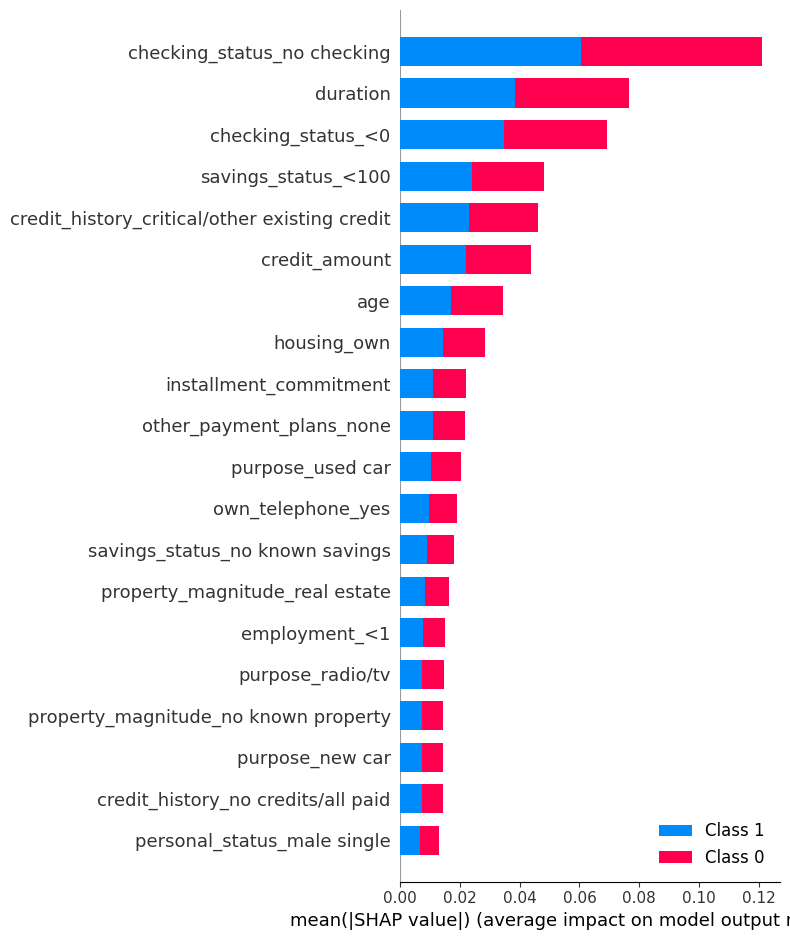

In [3]:
import joblib
import shap
import matplotlib.pyplot as plt

clf = joblib.load('random_forest_model.pkl')
explainer = shap.TreeExplainer(clf)
# Calculate SHAP values for a set of samples (e.g., X_test)
shap_values = explainer.shap_values(X_prime)

plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_prime, plot_type="bar")
plt.show()

### SHAP explanations for Good credit score 

* A positive checking account, a and a longer duration of existing credit all contribute to a higher predicted credit score. 
* We also see that the higher value of age tends to negatively affect a good credit score 
* The existence of other ongoing credits also lower the chances of getting a good credit score, similarly if all prior credits are paid, then the likelihood of a good credit score increases. 
* A higher credit amount also positively contribute to a good credit score. 

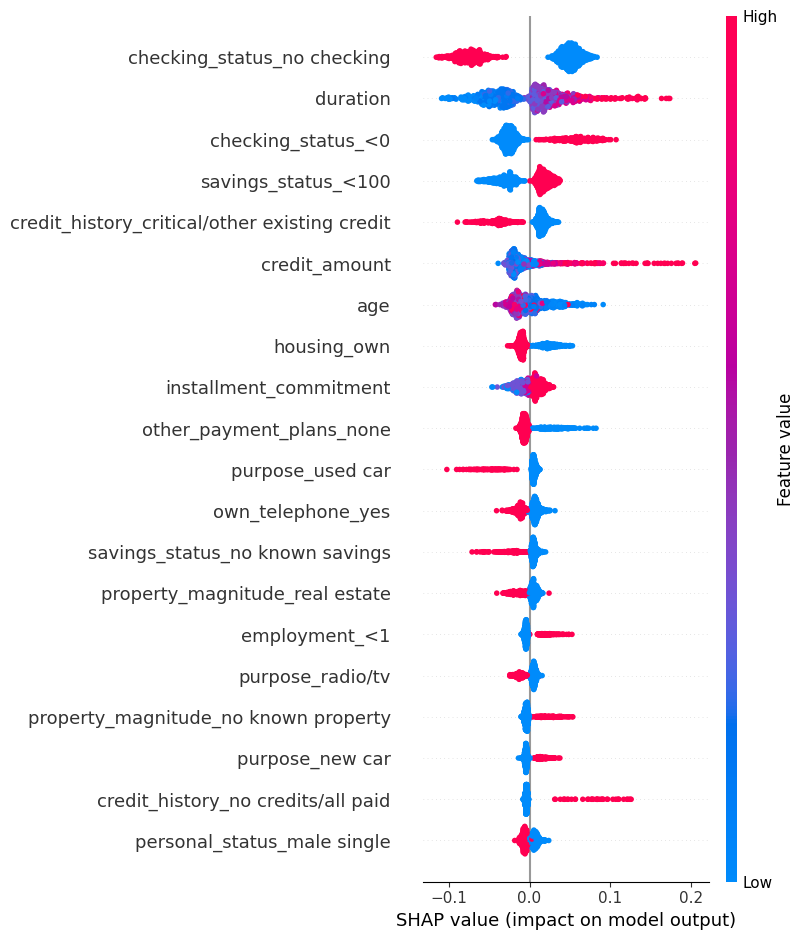

In [4]:
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[0], X_prime, plot_type="dot")
plt.show()

In [49]:
correctly_classified_indices_0 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred == y[index])& (pred == 'bad'))]
correctly_classified_indices_1 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred == y[index])& (pred == 'good'))]

print((correctly_classified_indices_0))
# Choose 1-2 misclassified instances
misclassified_indices_0 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred != y[index]) & (pred == 'bad'))]
misclassified_indices_1 = [index for index, pred in enumerate(clf.predict(X_prime)) if( (pred != y[index]) & (pred == 'good'))]

#print(misclassified_indices_0)


[1, 4, 9, 11, 18, 29, 35, 44, 54, 59, 62, 63, 68, 76, 87, 89, 95, 105, 106, 113, 120, 131, 155, 166, 170, 174, 175, 180, 181, 188, 191, 194, 197, 203, 212, 226, 227, 236, 237, 242, 249, 252, 257, 268, 273, 274, 289, 291, 295, 301, 302, 315, 320, 321, 332, 334, 337, 349, 353, 355, 359, 364, 368, 374, 375, 378, 381, 402, 414, 429, 431, 444, 446, 449, 454, 466, 470, 471, 475, 491, 495, 496, 500, 504, 505, 522, 528, 535, 538, 542, 545, 552, 558, 561, 569, 570, 578, 580, 583, 585, 593, 594, 596, 597, 602, 607, 610, 611, 618, 624, 631, 633, 634, 639, 640, 645, 648, 649, 652, 661, 677, 706, 707, 711, 714, 720, 721, 727, 728, 731, 736, 739, 755, 761, 763, 766, 771, 775, 780, 783, 788, 789, 796, 805, 809, 813, 814, 819, 822, 826, 827, 828, 831, 832, 835, 840, 849, 850, 853, 885, 887, 911, 914, 915, 918, 919, 922, 924, 927, 935, 938, 951, 953, 958, 972, 973, 980, 981, 998]


## Shap Force Plots For Misclassified instances as "good" 

In [38]:
print(type(explainer.expected_value))
print(explainer.expected_value.shape)
explainer.expected_value[0]

def show_force_plot(index): 
    explainer = shap.TreeExplainer(clf)
# Calculate SHAP values for a set of samples (e.g., X_test)
    shap_values = explainer.shap_values(X_prime)
# Visualize SHAP values for the selected instances

    force_plot = shap.force_plot(
        explainer.expected_value[0], 
        shap_values[0][index,:],
        feature_names= X_prime.columns.tolist()
    )
    shap.initjs()
    display(force_plot)


show_force_plot(143)
show_force_plot(15)

<class 'numpy.ndarray'>
(2,)


## Shap Force Plots For correctly classfied instances as "good" 

In [46]:
show_force_plot(24)
show_force_plot(150)

## Shap Force Plots For Misclassified instances as "bad" 

In [48]:
show_force_plot(229)
show_force_plot(993)

## Shap Force Plots For Correctly Classified instances as "bad" 

In [50]:
show_force_plot(63)
show_force_plot(212)